# 1. Data Engineering

What is Data Engineering?


What is ETL?

- Extract
- Transform
- Load

There are lots of platforms, softwares, tools used in Data Engineering.

- Data Warehouse
- Data Lakehouse

API (application programming interface)

## 1.1 Extract

1.1 Get the textual data

Note that we use ``requests`` library to extract data from a website (from wikipedia).

We define a function ``wikipedia_page`` which returns the page of a title.

In [1]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"

In [2]:
# We lowercase the text to avoid having to deal with uppercase and capitalized words
earth = wikipedia_page('Earth').lower()
print(earth) 

earth is the third planet from the sun and the only place known in the universe where life has originated and found habitability. while earth may not contain the largest volumes of water in the solar system, only earth sustains liquid surface water, extending over 70.8% of the earth with its ocean, making earth an ocean world. earth's polar regions currently retain most of all other water with large sheets of ice covering ocean and land, dwarfing earth's groundwater, lakes, rivers and atmospheric water. land, consisting of continents and islands, extends over 29.2% of the earth and is widely covered by vegetation. below earth's surface material lies earth's crust consisting of several slowly moving tectonic plates, which interact to produce mountain ranges, volcanoes, and earthquakes. earth's liquid outer core generates the magnetic field that shapes the magnetosphere of earth, largely deflecting destructive solar winds and cosmic radiation.
earth has an atmosphere, which shields earth

## 1.2 Transform

In [4]:
# import the wordcloud library

from wordcloud import WordCloud

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state=8,
                      normalize_plurals=False,
                      width=600,
                      height=300,
                      max_words=300,
                      stopwords=[])

(-0.5, 599.5, 299.5, -0.5)

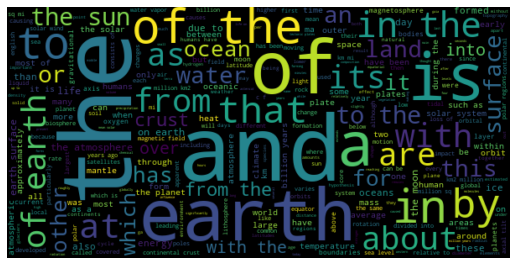

In [5]:

b

In [7]:
from collections import Counter

# we transform the text into a list of words
# by splitting over the space character ' '
earth_word_list = earth.split(' ')

# and count the words
earth_word_counts = Counter(earth_word_list)

In [9]:
# transform the text into a list of words
earth_words_list = earth.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
earth_without_stopwords = [word for word in earth_words_list if word not in stopwords]

In [10]:
Counter(earth_without_stopwords).most_common(20)

[("earth's", 117),
 ('earth', 76),
 ('surface', 47),
 ('about', 43),
 ('on', 42),
 ('it', 41),
 ('solar', 40),
 ('has', 38),
 ('million', 36),
 ('which', 35),
 ('or', 35),
 ('have', 34),
 ('water', 33),
 ('into', 33),
 ('life', 29),
 ('other', 28),
 ('over', 26),
 ('crust', 26),
 ('sun', 25),
 ('ocean', 25)]

In [13]:
common_earth = Counter(earth_without_stopwords).most_common(20)

## 1.3 Load

In [24]:
import pandas as pd

# initialize list of lists
data = []

# Create the pandas DataFrame
df = pd.DataFrame(
    data, columns=['title', 'common_words'])

# print dataframe.
df

,title,common_words


In [25]:
b

In [26]:
add_new("earth", common_earth)

,title,common_words
0,earth,"[(earth's, 117), (earth, 76), (surface, 47), (..."


In [27]:
df.to_csv('result.csv')

## Add a new line

In [29]:
moon = wikipedia_page('Moon').lower()

# by splitting over the space character ' '
moon_words_list = moon.split(' ')

# and count the words
moon_word_counts = Counter(moon_word_list)

# use a python list comprehension to remove the stopwords from words_list
moon_without_stopwords = [word for word in moon_words_list if word not in stopwords]

common_moon = Counter(moon_without_stopwords).most_common(20)

In [30]:
add_new("moon", common_moon)

,title,common_words
0,earth,"[(earth's, 117), (earth, 76), (surface, 47), (..."
1,moon,"[(, 477), (moon, 210), (lunar, 145), (on, 111)..."


In [31]:
df.to_csv('result.csv')

# 2. Data Engineering tools

Programming Languages
- Python
- C++
- C#

- SQL

- Bash, Linux commands
- and more...

Platforms
- Databricks
- GCP Dataflow

there are lots of them.

# 3. Cloud

**Cloud computing**
	- on demand, self-service
	- on internet
	- no worries for physical location
	- elastic
	- pay only what you use

**3 waves on the history of cloud computing**
	- colocation
	- virtualisation
	- container-based architecture

**IaaS (Infrastructure as a Service) & PaaS (Platform as a Service)**

In the IaaS model, customers pay for the resources they allocate ahead of time; 
In the PaaS model, customers pay for the resources they actually use.

```ad-warning
IaaS provides raw compute, storage, and network resources that are organised similarly to physical data centers

PaaS binds application code to libraries that give access to the infrastructure an application needs
```


IBM
GOOGLE CLOUD
AZURE
AMAZON WEB SERVICE

Docker ve Kubernetes

## Homework

Write a python application that takes one positional argument ``article``. 
The script must 
- extract the text file from the wikipedia
- transform the text as we did above
- load the article using add_new function above

When you run the script, it must load the new article to the file results.csv

### Step 1.

Complete the following

```python
import sys

def wiki_function (article):
    # write your code here 


if __name__ == "__main__":
    article = str(sys.argv[1])
    wiki_function(article)
```

### Step 2. 

Create a file ``app.py`` and put the code in the previous cell into this file.

### Step 3. How to use the script ?

open terminal
and put 

```shell
python app.py <"the_title">
```

For instance, if you put 

```shell
python app.py "sun"
```

it will load the data into result.csv